In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import chardet
from mpl_toolkits.mplot3d.axes3d import Axes3D
import seaborn as sns
import pylab


In [2]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

In [3]:
with open('lateraldata.txt', 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv('lateraldata.txt', encoding=result['encoding'], sep=';', comment='#')
zdata=pd.read_csv('mess2.txt', encoding=result['encoding'], sep=';', comment='#')

In [4]:
df0=df[(df['z[mm]']==0.0)]
df3=df[(df['z[mm]']==3.2)]
g0=df0[['x[mm]','y[mm]','Value']].pivot(index='x[mm]', columns='y[mm]', values='Value')
g3=df3[['x[mm]','y[mm]','Value']].pivot(index='x[mm]', columns='y[mm]', values='Value')

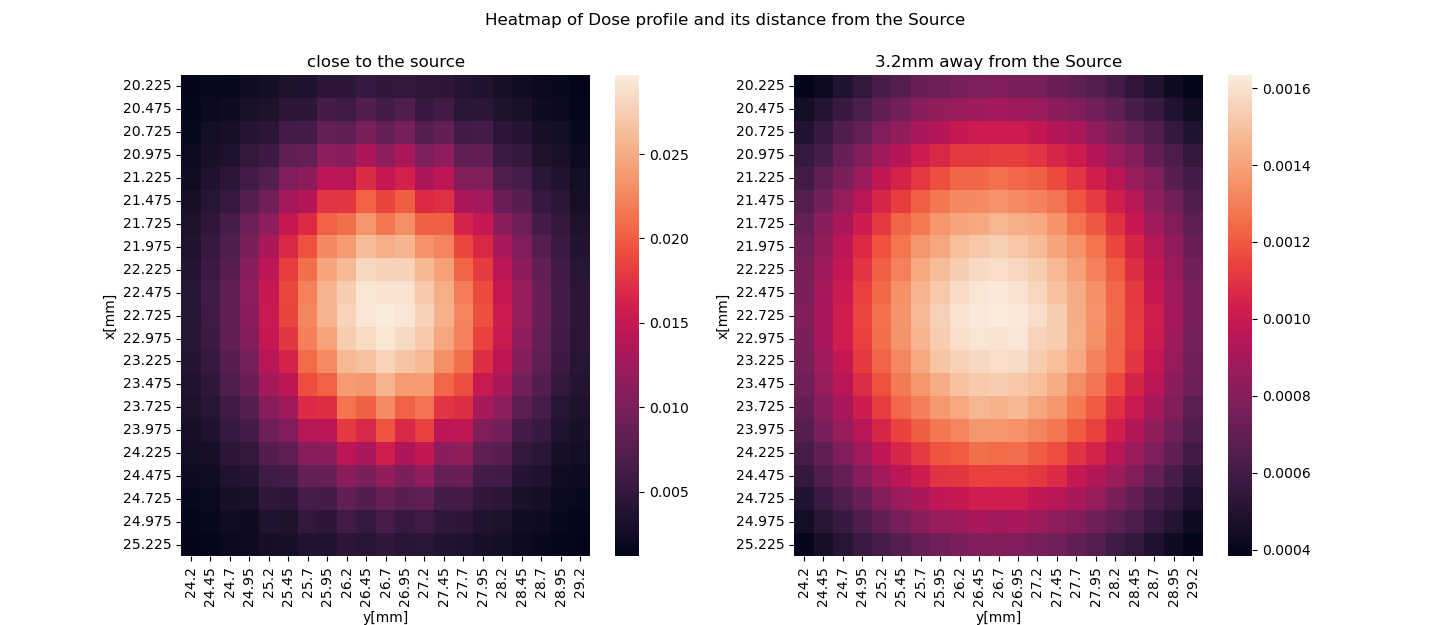

In [5]:
fig, axs = plt.subplots(1,2,figsize=(14.5,6.25))
fig.suptitle('Heatmap of Dose profile and its distance from the Source')
sns.heatmap(data=g0,ax=axs[0])
axs[0].set_title('close to the source')

sns.heatmap(data=g3,ax=axs[1])
axs[1].set_title('3.2mm away from the Source')

for ax in axs.flat:
    ax.set(xlabel='y[mm]', ylabel='x[mm]')


In [6]:
x0 = df0['x[mm]'].to_numpy()
y0 = df0['y[mm]'].to_numpy()
z0 = df0['Value'].to_numpy()
x3 = df3['x[mm]'].to_numpy()
y3 = df3['y[mm]'].to_numpy()
z3 = df3['Value'].to_numpy()

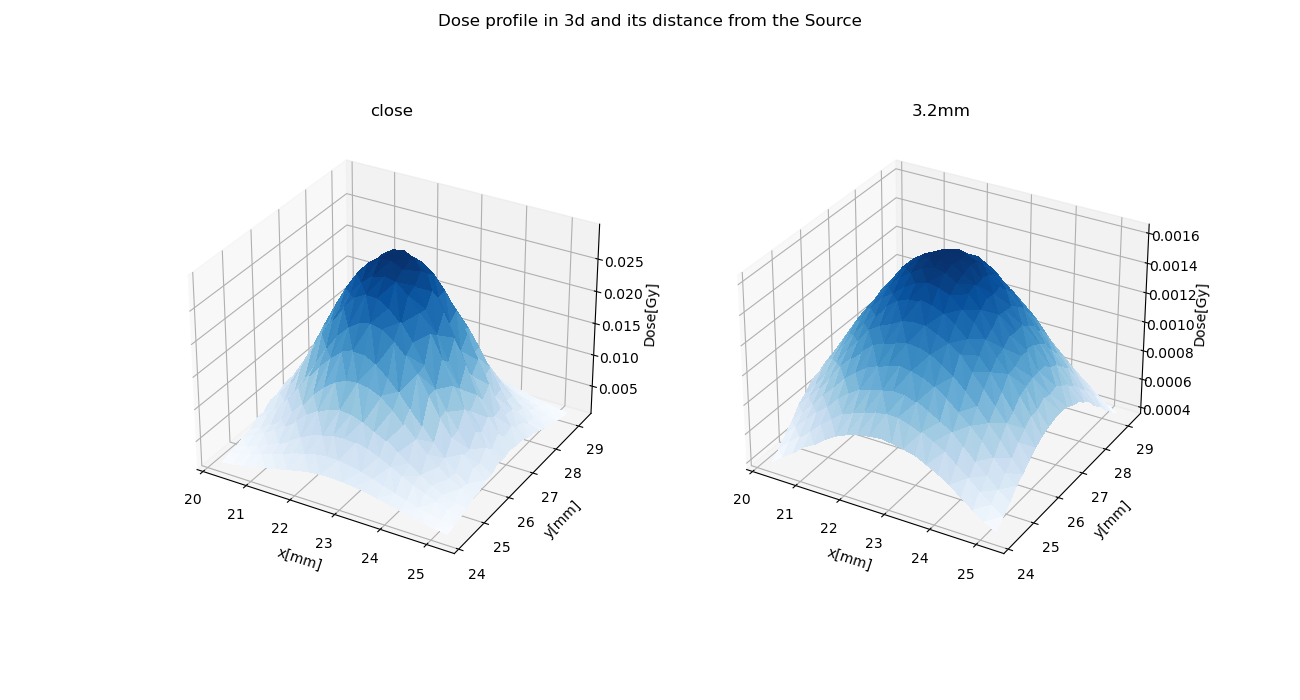

In [7]:
fig, axs = plt.subplots(1, 2,figsize=(13,7) ,subplot_kw=dict(projection='3d'))
fig.suptitle('Dose profile in 3d and its distance from the Source')

axs[ 0].plot_trisurf(x0,y0,z0,linewidth=0, antialiased=False, cmap=cm.Blues)
axs[ 0].set_title('close')

axs[1].plot_trisurf(x3,y3,z3,linewidth=0, antialiased=False, cmap=cm.Blues)
axs[1].set_title('3.2mm')

for ax in axs.flat:
    ax.set(xlabel='x[mm]', ylabel='y[mm]', zlabel='Dose[Gy]')


In [8]:
def fmax(data):
    zmax=0
    row=0
    coll=0
    for row in g0.index:
        if g0.loc[row].max()>zmax:
            zmax=g0.loc[row].max()
            roww=row
    zmax=0
    for col in g0.columns:
        if g0.loc[:,col].max()>zmax:
            zmax=g0.loc[:,col].max()
            coll=col
    return roww,coll

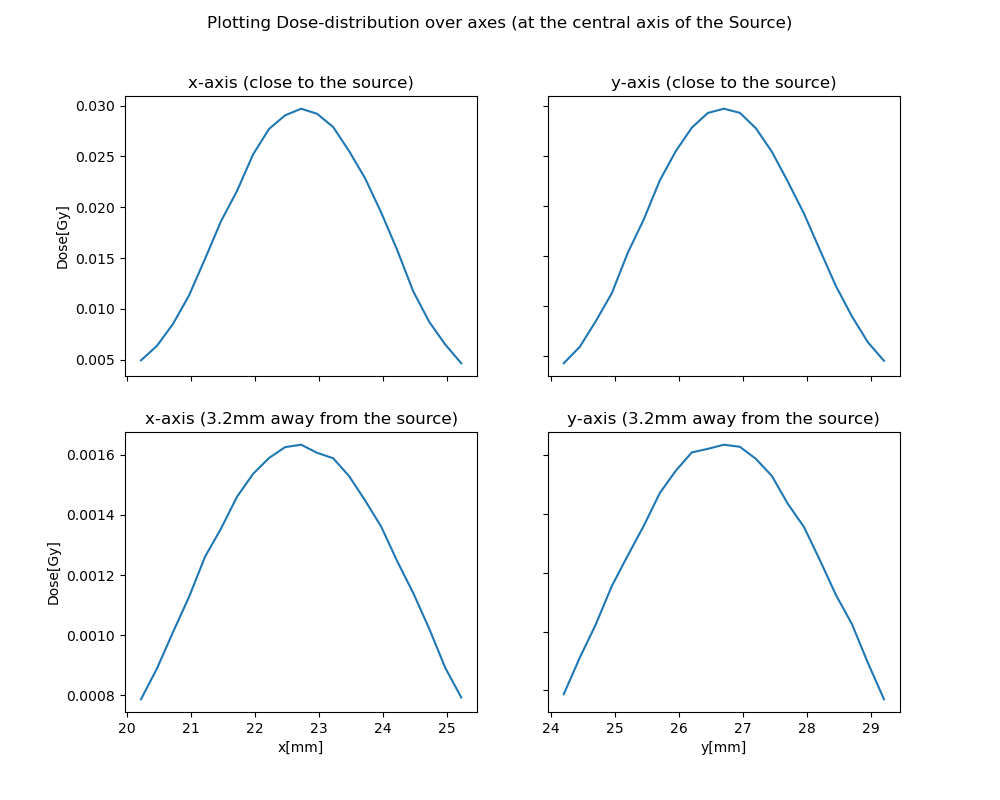

(22.725, 26.7)
(22.725, 26.7)


In [9]:
fig, ax_array = plt.subplots(2, 2, figsize=(10,8),squeeze=False)
fig.suptitle('Plotting Dose-distribution over axes (at the central axis of the Source)')

sns.lineplot(data=g0.loc[fmax(g0)[0]], ax=ax_array[0,1])
ax_array[0,0].set_title('x-axis (close to the source)')
sns.lineplot(data=g0.loc[:,fmax(g0)[1]],ax=ax_array[0,0])
ax_array[0,1].set_title('y-axis (close to the source)')
sns.lineplot(data=g3.loc[fmax(g3)[0]], ax=ax_array[1,1])
ax_array[1,0].set_title('x-axis (3.2mm away from the source)')
sns.lineplot(data=g3.loc[:,fmax(g3)[1]],ax=ax_array[1,0])
ax_array[1,1].set_title('y-axis (3.2mm away from the source)')

for ax in ax_array.flat:
    ax.set(ylabel='Dose[Gy]')
for ax in ax_array.flat:
    ax.label_outer()
plt.show()
print(fmax(g0))
print(fmax(g3))


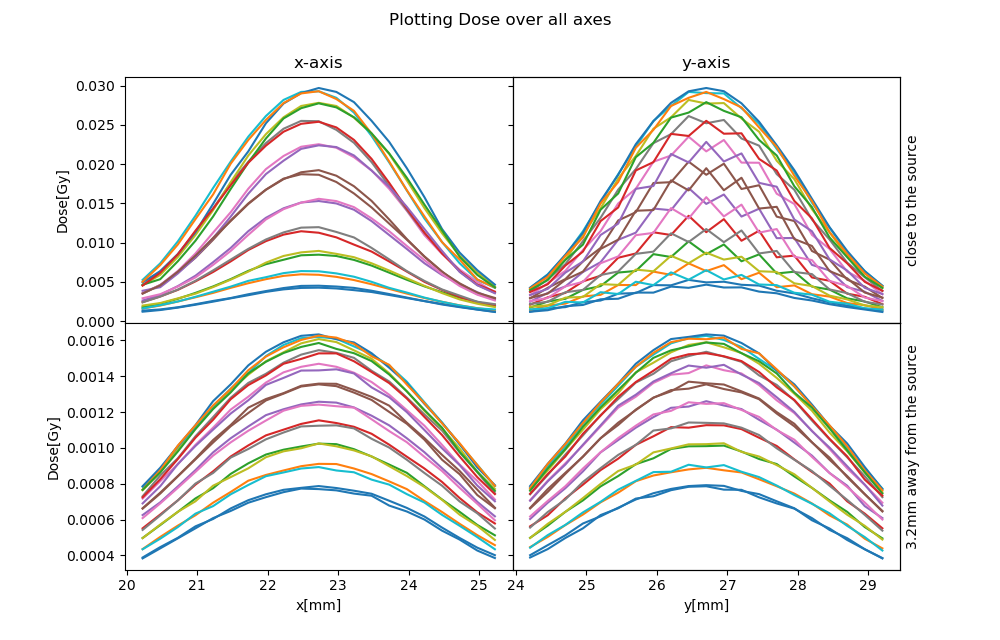

In [10]:
fig = plt.figure(figsize=(10,6.4))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Plotting Dose over all axes')
    
for row in g0.index:
    sns.lineplot(data=g0.loc[row], ax=ax2)
for col in g0.columns:
    sns.lineplot(data=g0.loc[:,col], ax=ax1)
for row in g3.index:
    sns.lineplot(data=g3.loc[row], ax=ax4)
for col in g3.columns:
    sns.lineplot(data=g3.loc[:,col], ax=ax3)

ax1.set(ylabel='Dose[Gy]')
ax3.set(xlabel='x[mm]',ylabel='Dose[Gy]')
ax4.set(xlabel='y[mm]')
for ax in fig.get_axes():
    ax.label_outer()
axes2 = ax2.twinx()
axes2.set_yticks([])
axes2.set_ylabel('close to the source')
axes3 = ax4.twinx()
axes3.set_yticks([])
axes3.set_ylabel('3.2mm away from the source')
ax1.set_title('x-axis')
ax2.set_title('y-axis')
plt.show()

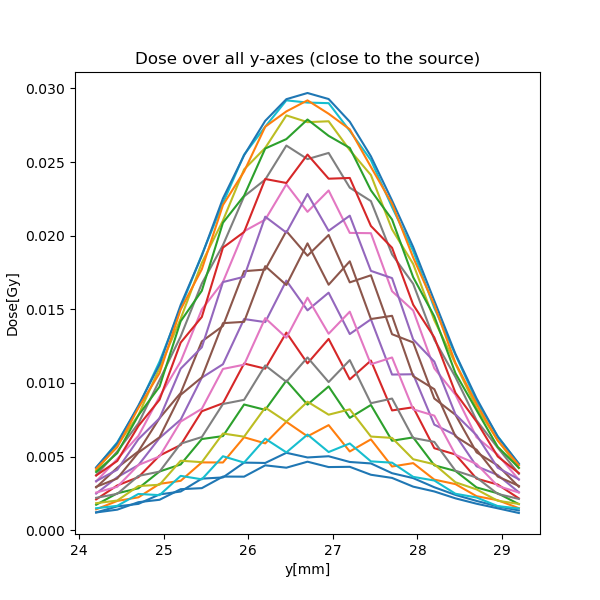

In [11]:
fig, ax = plt.subplots(figsize=(6,6))

for row in g0.index:
    sns.lineplot(data=g0.loc[row])
plt.title('Dose over all y-axes (close to the source)')
plt.ylabel('Dose[Gy]')
plt.show()

/software/opt/focal/x86_64/python/3.10-2022.08/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


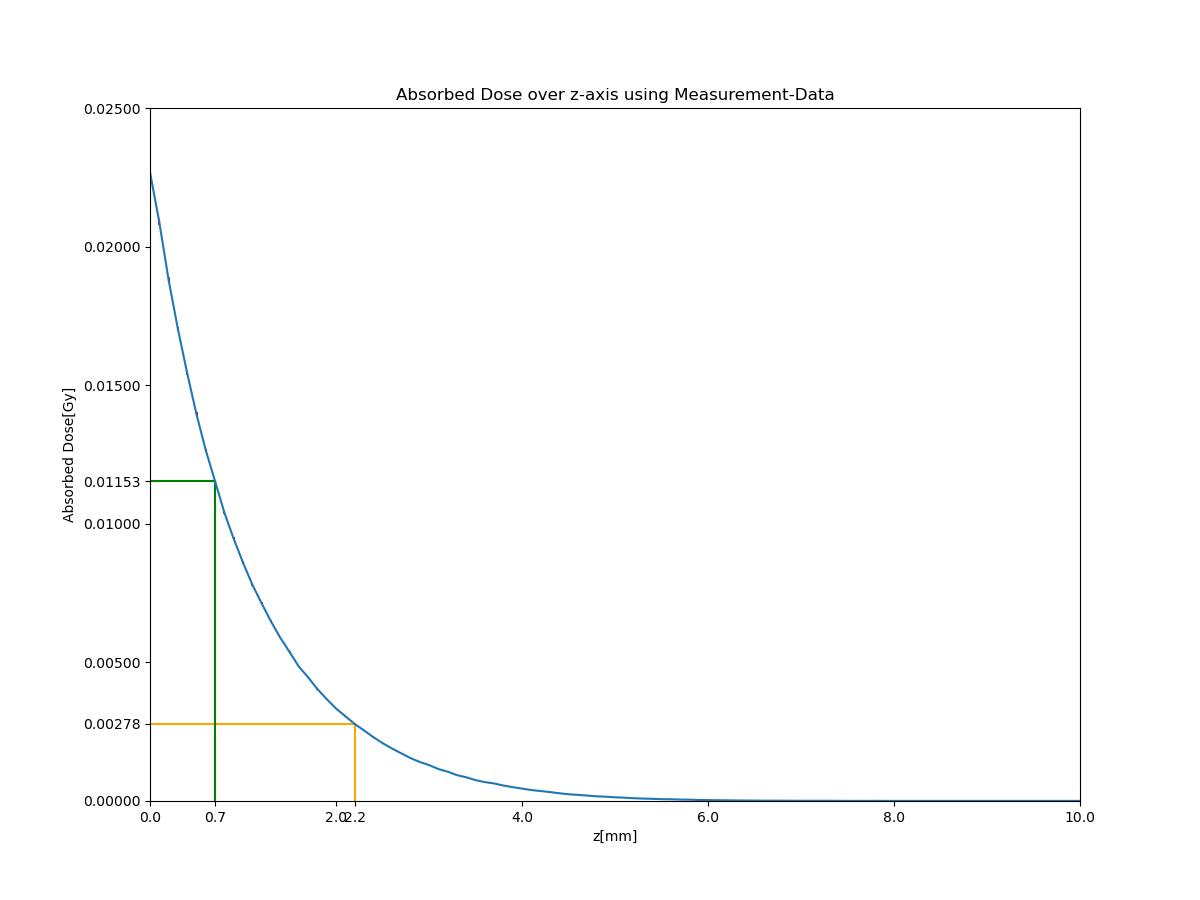

In [12]:
err=np.array([(lambda x: ((0.5+0.25*x['Resolution'])/100)*x['Value'])(zdata)]).flatten()
fig, ax = plt.subplots(figsize=(12,9))

plt.errorbar(zdata['z[mm]'], zdata['Value'], yerr=err, fmt='-',ecolor='red')

ph=(zdata.iloc[(zdata['Value']-zdata['Value'].max()/8).abs().argsort()[:1]]['z[mm]'].to_numpy()[0],zdata.iloc[(zdata['Value']-zdata['Value'].max()/8).abs().argsort()[:1]]['Value'])
pq=(zdata.iloc[(zdata['Value']-zdata['Value'].max()/2).abs().argsort()[:1]]['z[mm]'].to_numpy()[0],zdata.iloc[(zdata['Value']-zdata['Value'].max()/2).abs().argsort()[:1]]['Value'].to_numpy()[0])
#ph=(zdata.iloc[(zdata['Value']-zdata['Value'].max()/16).abs().argsort()[:1]]['z[mm]'].to_numpy()[0],zdata.iloc[(zdata['Value']-zdata['Value'].max()/16).abs().argsort()[:1]]['Value'].to_numpy()[0])

plt.plot([ph[0],ph[0]],[0,ph[1]],c='orange')
plt.plot([0,ph[0]],[ph[1],ph[1]],c='orange')

plt.plot([pq[0],pq[0]],[0,pq[1]],c='green')
plt.plot([0,pq[0]],[pq[1],pq[1]],c='green')

plt.xlabel('z[mm]')
plt.ylabel('Absorbed Dose[Gy]')
plt.title('Absorbed Dose over z-axis using Measurement-Data')
plt.xlim(0,10)
plt.ylim(0,None)
xt = ax.get_xticks() 
xt=np.append(xt,ph[0])
xt=np.append(xt,pq[0])
ax.set_xticks(xt)

xt = ax.get_yticks() 
xt=np.append(xt,ph[1])
xt=np.append(xt,pq[1])
ax.set_yticks(xt)
plt.show()

In [13]:
0.01153*(0.7+0.4)**2
#0.00278*(2.2+0.4)**2

0.013951300000000003

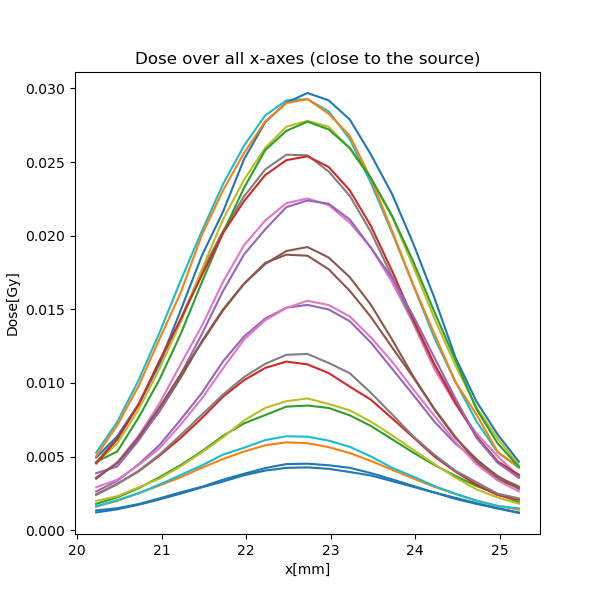

In [14]:
fig, ax = plt.subplots(figsize=(6,6))

for row in g0.columns:
    sns.lineplot(data=g0.loc[:,row])
plt.title('Dose over all x-axes (close to the source)')
plt.ylabel('Dose[Gy]')
plt.show()

/software/opt/focal/x86_64/python/3.10-2022.08/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


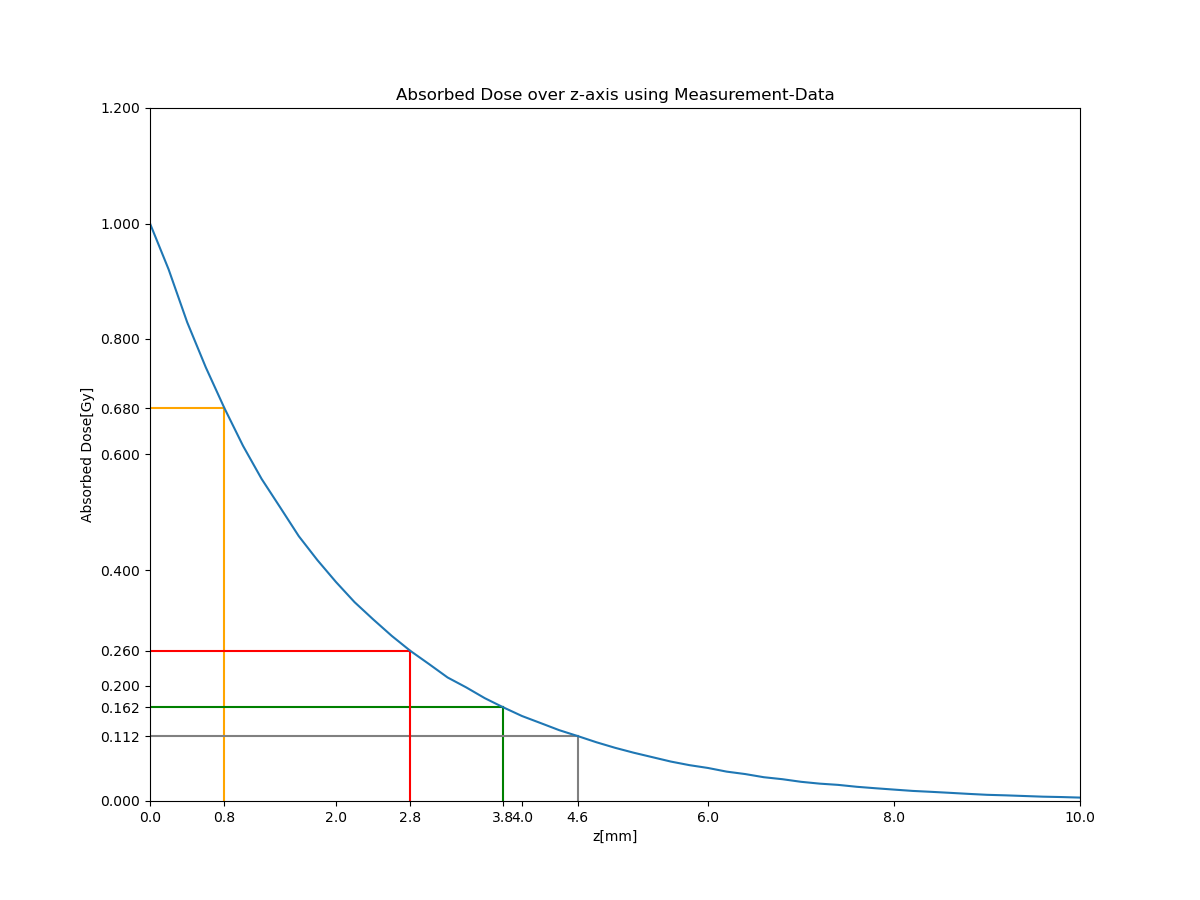

In [15]:
err=np.array([(lambda x: ((0.5+0.25*x['Resolution'])/100)*x['Value'])(zdata)]).flatten()
fig, ax = plt.subplots(figsize=(12,9))

plt.errorbar(zdata['z[mm]']*2, zdata['Value']/np.max(zdata['Value']), yerr=err, fmt='-',ecolor='red')

ph=(zdata.iloc[(zdata['Value']-0.015).abs().argsort()[:1]]['z[mm]'].to_numpy()[0]*2,zdata.iloc[(zdata['Value']-0.015).abs().argsort()[:1]]['Value']/np.max(zdata['Value']))
pq=(zdata.iloc[(zdata['Value']-0.015/4).abs().argsort()[:1]]['z[mm]'].to_numpy()[0]*2,zdata.iloc[(zdata['Value']-0.015/4).abs().argsort()[:1]]['Value'].to_numpy()[0]/np.max(zdata['Value']))

ph2=(zdata.iloc[(zdata['Value']-zdata['Value'].max()/9).abs().argsort()[:1]]['z[mm]'].to_numpy()[0]*2,zdata.iloc[(zdata['Value']-zdata['Value'].max()/9).abs().argsort()[:1]]['Value']/np.max(zdata['Value']))
pq2=(zdata.iloc[(zdata['Value']-zdata['Value'].max()/4).abs().argsort()[:1]]['z[mm]'].to_numpy()[0]*2,zdata.iloc[(zdata['Value']-zdata['Value'].max()/4).abs().argsort()[:1]]['Value'].to_numpy()[0]/np.max(zdata['Value']))

plt.plot([ph[0],ph[0]],[0,ph[1]],c='orange')
plt.plot([0,ph[0]],[ph[1],ph[1]],c='orange')

plt.plot([pq[0],pq[0]],[0,pq[1]],c='green')
plt.plot([0,pq[0]],[pq[1],pq[1]],c='green')

plt.plot([ph2[0],ph2[0]],[0,ph2[1]],c='gray')
plt.plot([0,ph2[0]],[ph2[1],ph2[1]],c='gray')

plt.plot([pq2[0],pq2[0]],[0,pq2[1]],c='red')
plt.plot([0,pq2[0]],[pq2[1],pq2[1]],c='red')

plt.xlabel('z[mm]')
plt.ylabel('Absorbed Dose[Gy]')
plt.title('Absorbed Dose over z-axis using Measurement-Data')
plt.xlim(0,10)
plt.ylim(0,None)
xt = ax.get_xticks() 
xt=np.append(xt,ph[0])
xt=np.append(xt,ph2[0])

xt=np.append(xt,pq[0])
xt=np.append(xt,pq2[0])

ax.set_xticks(xt)

xt = ax.get_yticks() 
xt=np.append(xt,ph[1])
xt=np.append(xt,ph2[1])
xt=np.append(xt,pq[1])
xt=np.append(xt,pq2[1])
ax.set_yticks(xt)
plt.show()

In [16]:
4.6/3

1.5333333333333332

/software/opt/focal/x86_64/python/3.10-2022.08/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


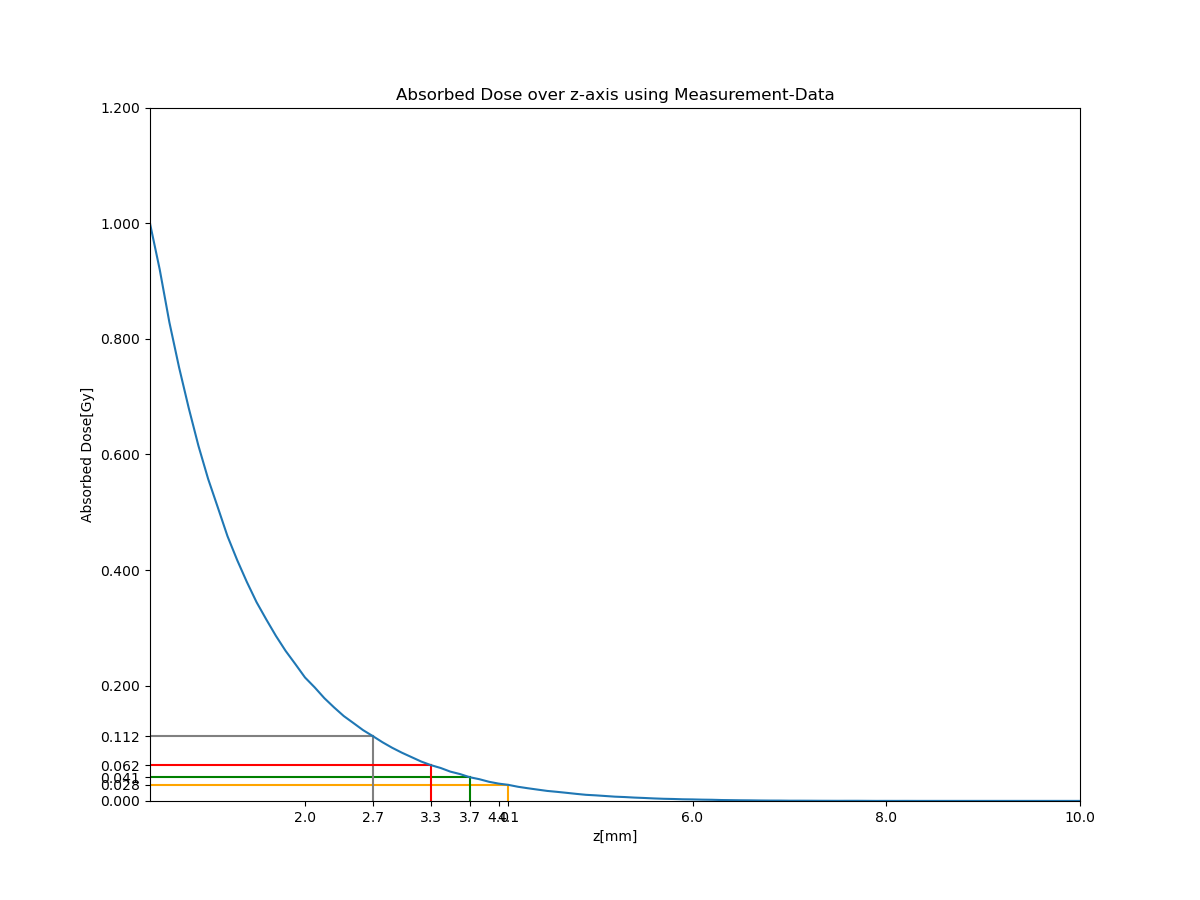

In [17]:
err=np.array([(lambda x: ((0.5+0.25*x['Resolution'])/100)*x['Value'])(zdata)]).flatten()
fig, ax = plt.subplots(figsize=(12,9))

plt.errorbar(zdata['z[mm]']+0.4, zdata['Value']/np.max(zdata['Value']), yerr=err, fmt='-',ecolor='red')

ph=(zdata.iloc[(zdata['Value']-zdata['Value'].max()/36).abs().argsort()[:1]]['z[mm]'].to_numpy()[0]+0.4,zdata.iloc[(zdata['Value']-zdata['Value'].max()/36).abs().argsort()[:1]]['Value']/np.max(zdata['Value']))
pq=(zdata.iloc[(zdata['Value']-zdata['Value'].max()/25).abs().argsort()[:1]]['z[mm]'].to_numpy()[0]+0.4,zdata.iloc[(zdata['Value']-zdata['Value'].max()/25).abs().argsort()[:1]]['Value'].to_numpy()[0]/np.max(zdata['Value']))

ph2=(zdata.iloc[(zdata['Value']-zdata['Value'].max()/9).abs().argsort()[:1]]['z[mm]'].to_numpy()[0]+0.4,zdata.iloc[(zdata['Value']-zdata['Value'].max()/9).abs().argsort()[:1]]['Value']/np.max(zdata['Value']))
pq2=(zdata.iloc[(zdata['Value']-zdata['Value'].max()/16).abs().argsort()[:1]]['z[mm]'].to_numpy()[0]+0.4,zdata.iloc[(zdata['Value']-zdata['Value'].max()/16).abs().argsort()[:1]]['Value'].to_numpy()[0]/np.max(zdata['Value']))

plt.plot([ph[0],ph[0]],[0,ph[1]],c='orange')
plt.plot([0,ph[0]],[ph[1],ph[1]],c='orange')

plt.plot([pq[0],pq[0]],[0,pq[1]],c='green')
plt.plot([0,pq[0]],[pq[1],pq[1]],c='green')

plt.plot([ph2[0],ph2[0]],[0,ph2[1]],c='gray')
plt.plot([0,ph2[0]],[ph2[1],ph2[1]],c='gray')

plt.plot([pq2[0],pq2[0]],[0,pq2[1]],c='red')
plt.plot([0,pq2[0]],[pq2[1],pq2[1]],c='red')

plt.xlabel('z[mm]')
plt.ylabel('Absorbed Dose[Gy]')
plt.title('Absorbed Dose over z-axis using Measurement-Data')
xt = ax.get_xticks() 
xt=np.append(xt,ph[0])
xt=np.append(xt,ph2[0])

xt=np.append(xt,pq[0])
xt=np.append(xt,pq2[0])

ax.set_xticks(xt)

xt = ax.get_yticks() 
xt=np.append(xt,ph[1])
xt=np.append(xt,ph2[1])
xt=np.append(xt,pq[1])
xt=np.append(xt,pq2[1])
ax.set_yticks(xt)
plt.xlim(0.4,10)
plt.ylim(0,None)
plt.show()

In [18]:
1.82/2
2.7/3
3.3/4
3.7/5
4.1/6

0.6833333333333332

In [19]:
4.1/6

0.6833333333333332

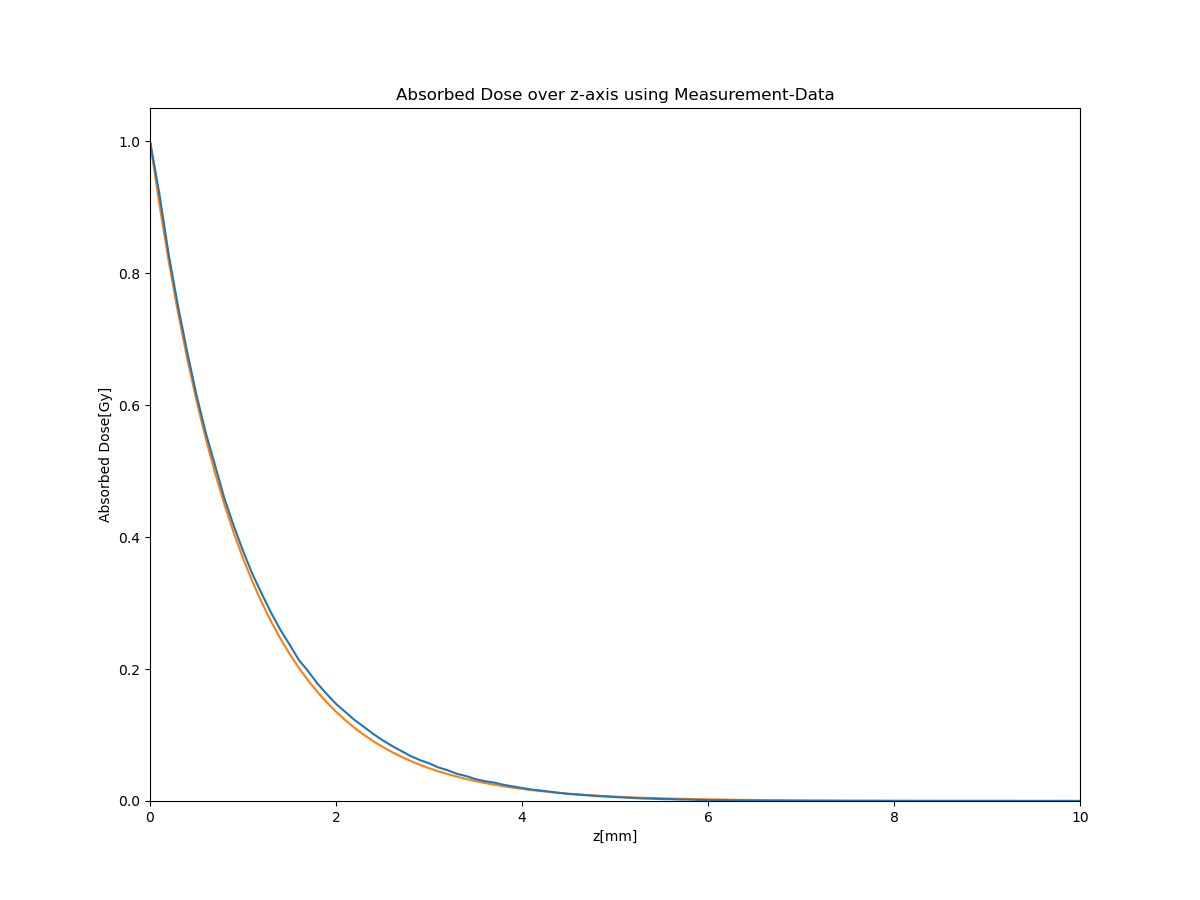

In [20]:
err=np.array([(lambda x: ((0.5+0.25*x['Resolution'])/100)*x['Value'])(zdata)]).flatten()
fig, ax = plt.subplots(figsize=(12,9))

plt.errorbar(zdata['z[mm]'], zdata['Value']/np.max(zdata['Value']), yerr=err, fmt='-',ecolor='red')
plt.plot(zdata['z[mm]'],np.exp(-zdata['z[mm]']))


plt.xlabel('z[mm]')
plt.ylabel('Absorbed Dose[Gy]')
plt.title('Absorbed Dose over z-axis using Measurement-Data')
plt.xlim(0,10)
plt.ylim(0,None)

plt.show()

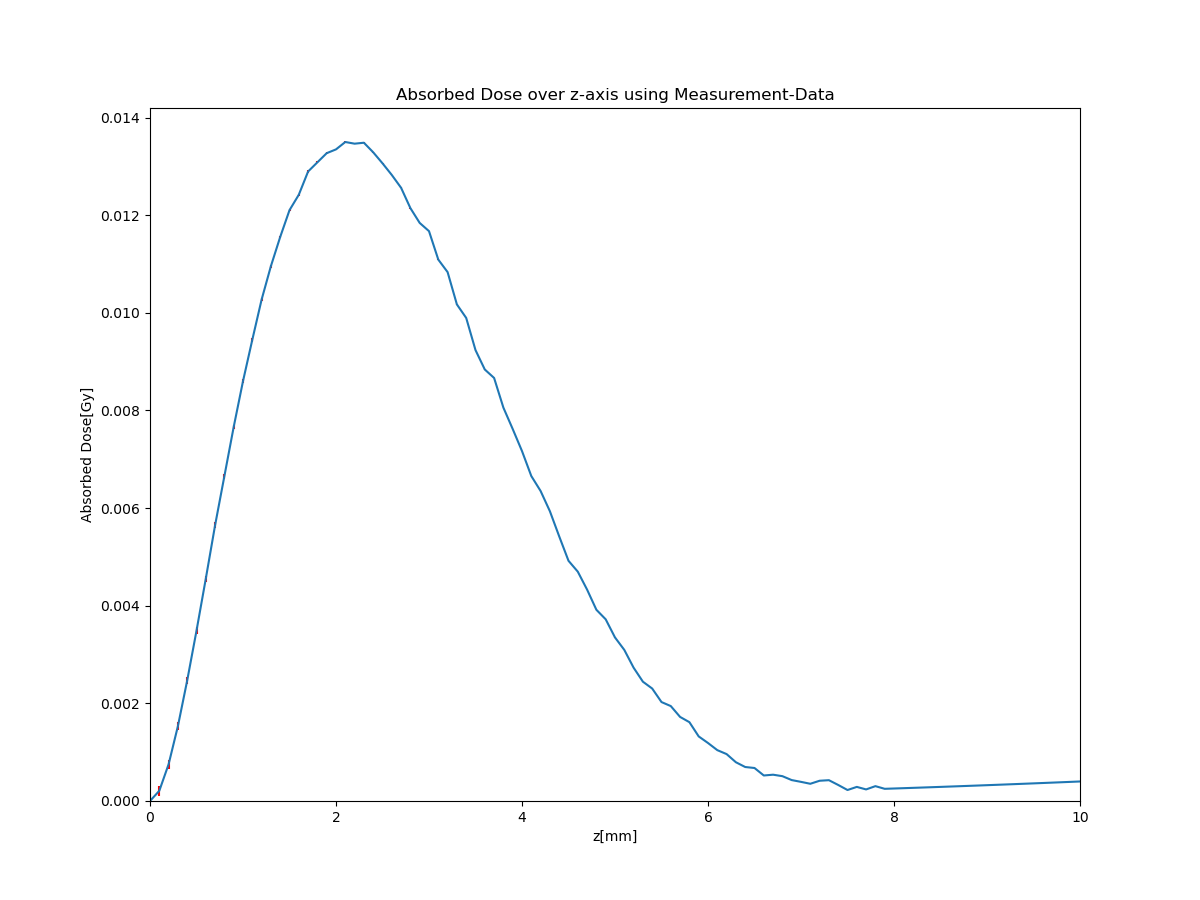

In [21]:
err=np.array([(lambda x: ((0.5+0.25*x['Resolution'])/100)*x['Value'])(zdata)]).flatten()
fig, ax = plt.subplots(figsize=(12,9))

#plt.errorbar(zdata['z[mm]'], zdata['Value']/np.exp(-zdata['z[mm]']), yerr=err, fmt='-',ecolor='red')
#plt.plot(zdata['z[mm]'],np.exp(-zdata['z[mm]']))
plt.errorbar(zdata['z[mm]'], zdata['Value']*(zdata['z[mm]'])**2, yerr=err, fmt='-',ecolor='red')

plt.xlabel('z[mm]')
plt.ylabel('Absorbed Dose[Gy]')
plt.title('Absorbed Dose over z-axis using Measurement-Data')
plt.xlim(0,10)
plt.ylim(0,None)

plt.show()